**Python (Semester 1 2024)**
# 3 Data Exploration

*N. Hernitschek*

This notebook contains examples related to data exploration including file handling and plotting for **Python (Semester 2 2024)**. 

---
## Contents
* [Using Pandas](#first-bullet)
* [Data Exploration with plots](#second-bullet)
* [Summary](#nineth-bullet)


## 1. Using Pandas <a class="anchor" id="first-bullet"></a>

Pandas is a Python library used for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

https://pandas.pydata.org/


## Loading data file using Pandas
Input data sets can be in various formats (.XLS, .TXT, .CSV, JSON ). In Python, it is easy to load data from any source, due to its simple syntax and availability of predefined libraries, such as Pandas. Here I will make use of Pandas itself.
Pandas features a number of functions for reading tabular data as a Pandas DataFrame object. Below are the common functions that can be used to read data (including read_csv in Pandas):

See the following example on loading data from a `*.csv` file:
Loading data from a txt file(s):


In [2]:

import pandas as pd

df=pd.read_csv("lightcurve.csv",sep=',') # Load data from a comma-separated file
print (df)


              mjd        mag    magerr  filter
0     1325.328857  16.119598  0.018178       1
1     1325.349731  16.116632  0.018189       1
2     1325.370605  16.119034  0.018218       1
3     1325.391357  16.120831  0.018228       1
4     1325.412231  16.118868  0.018226       1
...           ...        ...       ...     ...
1277  1353.079224  16.120066  0.018772       1
1278  1353.099976  16.121529  0.018849       1
1279  1353.120850  16.125744  0.018859       1
1280  1353.141602  16.128799  0.019032       1
1281  1353.162476  16.123592  0.019713       1

[1282 rows x 4 columns]


## Converting a variable to a different data type

Converting a variable data type to others is an important and common procedure we perform after loading data. 

In the above example, all numeric variables were automatically imported as `float`. It would make sense to convert the data type of the `filter` column to `int`.


In [3]:
# change data type of column 'filter' to int
df = df.astype({'filter':'int'})
print(df.dtypes)
print(df)

mjd       float64
mag       float64
magerr    float64
filter      int64
dtype: object
              mjd        mag    magerr  filter
0     1325.328857  16.119598  0.018178       1
1     1325.349731  16.116632  0.018189       1
2     1325.370605  16.119034  0.018218       1
3     1325.391357  16.120831  0.018228       1
4     1325.412231  16.118868  0.018226       1
...           ...        ...       ...     ...
1277  1353.079224  16.120066  0.018772       1
1278  1353.099976  16.121529  0.018849       1
1279  1353.120850  16.125744  0.018859       1
1280  1353.141602  16.128799  0.019032       1
1281  1353.162476  16.123592  0.019713       1

[1282 rows x 4 columns]


### Sorting a Pandas dataframe

Sorting of data can be done using `dataframe.sort()` It can be based on multiple variables and ascending or descending both orders.



In [4]:

#Sorting Pandas dataframe 
df=df.sort_values(['mjd'], ascending=[False])
print(df)

              mjd        mag    magerr  filter
1281  1353.162476  16.123592  0.019713       1
1280  1353.141602  16.128799  0.019032       1
1279  1353.120850  16.125744  0.018859       1
1278  1353.099976  16.121529  0.018849       1
1277  1353.079224  16.120066  0.018772       1
...           ...        ...       ...     ...
4     1325.412231  16.118868  0.018226       1
3     1325.391357  16.120831  0.018228       1
2     1325.370605  16.119034  0.018218       1
1     1325.349731  16.116632  0.018189       1
0     1325.328857  16.119598  0.018178       1

[1282 rows x 4 columns]


### Generate frequency tables with Pandas

Frequency Tables can be used to understand the distribution of categorical variables.

**Exercise:** Edit the file `lightcurve.csv` in a text editor. Assign a different filter (e.g. `2`) to some of the observations. Modify the following example code to create a frequency table regarding the column `filter`.



In [5]:
# example code

df=pd.read_excel("file.txt") 
print(df)
test= df.groupby(['type'])
test.size()

FileNotFoundError: [Errno 2] No such file or directory: 'file.txt'



### Removing duplicates in tables with Pandas

Often, we encounter duplicate observations. We can remove them by using `dataframe.drop_duplicates()`.

**Exercise:** Edit the file `lightcurve.csv` in a text editor. Duplicate some table rows. Modify the following example code to remove those duplicates from the dataframe.



In [44]:
# example code
    
    
df=pd.read_excel("file_duplicates.txt") 
print(df)
rem_dup=df.drop_duplicates(['mjd'])
print(rem_dup)






FileNotFoundError: [Errno 2] No such file or directory: 'file_duplicates.txt'


### Identifying missing values in tables with Pandas

To identify missing values , we can use `dataframe.isnull()`.

**Exercise:** Edit the file `lightcurve.csv` in a text editor so that values are missing. E.g.
modify a row so it looks like `1353.162476,,0.019713,1`.
Write code to identify this issue.


## 2. Data Exploration with plots <a class="anchor" id="second-bullet"></a>



In the following, we will create plots based on the above light curve file.
We will first plot the light curve including magnitude errors, and then create a histogram to show the distribution of magnitudes measured.


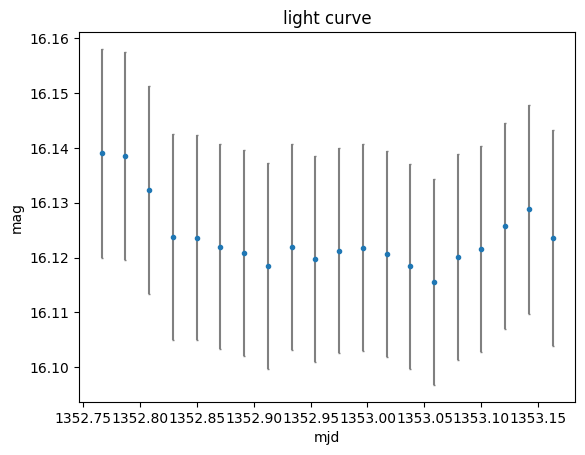

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# example data
x = df['mjd'][0:20]
y = df['mag'][0:20]
error = df['magerr'][0:20]

fig=plt.errorbar(x, y, yerr=error, fmt='.',ms=6,ecolor='grey',capsize=1, capthick=1)

#disable scientific notation on both axis
plt.ticklabel_format(useOffset=False, style='plain')


plt.title('light curve')
plt.xlabel('mjd')
plt.ylabel('mag')

plt.show()


**Exercise:** Try to make the plot easier to read.

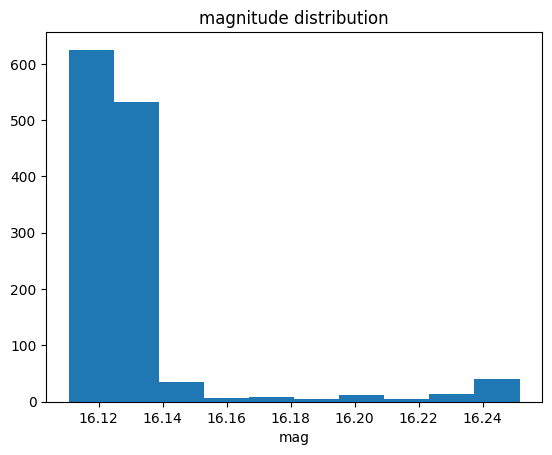

In [43]:


# example data

fig=plt.hist(df['mag'],bins=10)
plt.title('magnitude distribution')
plt.xlabel('mag')

plt.show()


**Exercise:** For which purpose might this plot be useful?

## Summary <a class="anchor" id="nineth-bullet"></a>


By viewing summary statistics, understanding the data types of each column, checking for missing values, we can gain first valuable insights into our dataset.
Additionally, visualizing the data helps us uncover patterns and trends that may not be apparent from the raw numbers alone. Data exploration is an essential step in any data analysis project, as it forms the foundation for further analysis and modeling.


